## Observations and Insights
#### Add your analysis here
---

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')
merged_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [61]:
# Check the number of mice.
mouse_metadata
number_of_mice=len(mouse_metadata)
number_of_mice

249

In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
repeat_mouse=merged_df
repeat_mouse.duplicated(subset=['Mouse ID','Timepoint'],keep=False)
#filter rows for mouse ID 
merged_df_mouse_id=merged_df[merged_df['Mouse ID']=='g989']
merged_df_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged_df[merged_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [63]:
# Check the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.

Avg_tumor_vol=clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"] 
Median_tumor_vol=clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"] 
Variance_tumor_vol=clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
Std_tumor_vol=clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
SE_tumor_vol=clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
Summary_Statistics=pd.DataFrame({'Mean Tumor Volume':Avg_tumor_vol,'Median Tumor Volume':Median_tumor_vol,
                                'Tumor Volume Variance':Variance_tumor_vol,'Tumor Volume STDeviation':Std_tumor_vol,
                                'Tumor Volume STD Error':SE_tumor_vol})
Summary_Statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STDeviation,Tumor Volume STD Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function
clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Filter the DataFrame down only to those columns to chart
drug_treatment=clean_df.groupby('Drug Regimen')
#count how many times drug treatment appears in our column
count_drug=drug_treatment['Drug Regimen'].count()
count_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

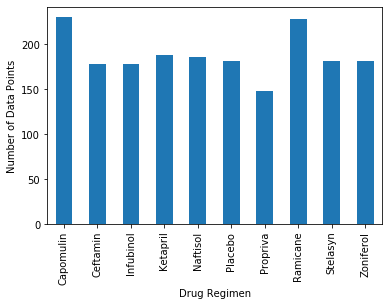

In [78]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create a bar chart based off of the group series from before
count_chart = count_drug.plot(kind='bar')
# Set the xlabel and ylabel 
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Data Points")

plt.show()

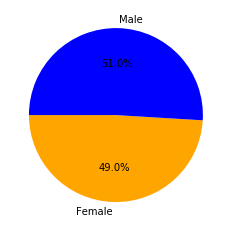

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=clean_df.groupby('Sex')

#count the distribution of female vs male mice appears in our column
gender_count=gender['Sex'].count()
gender_count
#labels  for the sections of  our pie chart
labels=['Female','Male']
# The values of each section of the pie chart
sizes = [922, 958]
# The colors of each section of the pie chart
colors = ["orange", "blue"]
#plot pie chart
plt.pie(sizes,labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume=clean_df.groupby(['Mouse ID']).last()['Timepoint']
tumor_volume_df=tumor_volume.reset_index()
last_tumor_vol=tumor_volume_df=pd.DataFrame(tumor_volume)
#merge this group df with the original dataframe to get the tumor volume at the last point 
last_merged_tumor_vol=pd.merge(tumor_volume_df,clean_df,on=['Mouse ID','Timepoint'],how='left')
last_merged_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [46]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []
# Locate the rows which contain mice on each drug and get the tumor volumes
    
# add subset to tumor volume data list
    
# Determine outliers using upper and lower bounds

for drug in treatment_list:
    final_tumor_volume=last_merged_tumor_vol[last_merged_tumor_vol['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_volume)
    quartiles=final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_treatment_list = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug} outliers: {outlier_treatment_list}") 


Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


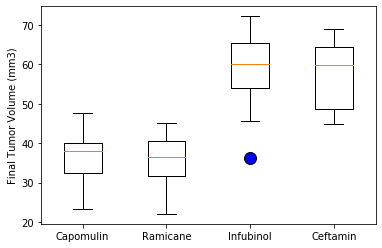

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker_style=dict(markerfacecolor='blue',markersize=12)
plt.boxplot(tumor_vol_list,labels=treatment_list,flierprops=marker_style)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

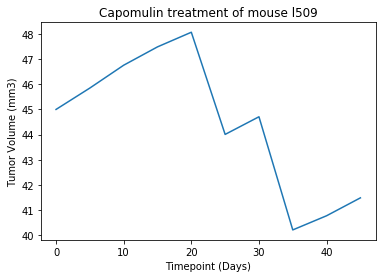

In [82]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice=clean_df[clean_df['Drug Regimen']=='Capomulin']
mouse=capomulin_mice[capomulin_mice['Mouse ID']=='l509']
timep=mouse['Timepoint']
tumorvol=mouse['Tumor Volume (mm3)']
plt.title('Capomulin treatment of mouse l509')
plt.plot(timep,tumorvol)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

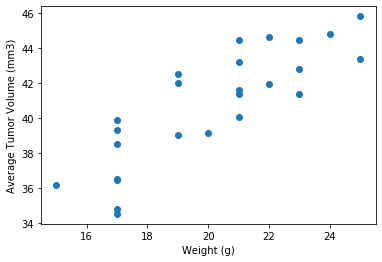

In [83]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg=capomulin_mice.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume (mm3) is 0.84


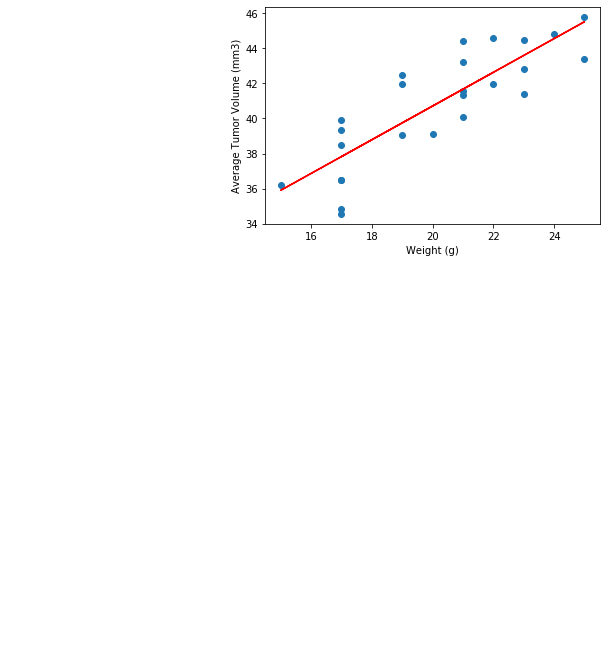

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_avg=capomulin_mice.groupby(['Mouse ID']).mean()
capomulin_avg
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


#correlation
correlation = round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)

#liner regression
x_values = capomulin_mice['Weight (g)']
y_values = capomulin_mice['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume (mm3) is {correlation}")
plt.show()